In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-financial-dataset/Amazon Financial Dataset.xlsx


[](https://www.the-sun.com/wp-content/uploads/sites/6/2023/07/LG-AMAZON-ACER-LAPTOP-OFFPLAT.jpg?strip=all&quality=100&w=1920&h=1080&crop=1)

 **log normalization** and analyze the data.

---

### **Step 1: Load the Dataset**
- Load the Excel file into a pandas DataFrame.
- Display the first few rows of the dataset for verification.

---

### **Step 2: Apply Log Normalization**
#### Formula for Log Normalization:  
x base log = log(x+1)
- Log normalization is applied to handle skewness and scale large values into a smaller range.

---

### **Step 3: Visualize Log Normalized Data**
- Example column: Use "R&D Amount" for visualization.
- Plot a line graph to show the transformed values.

---

### **Step 4: Gaussian Distribution**
- Plot the Gaussian distribution of the log-normalized data using the `seaborn` library.

The formula for a Gaussian (Normal) Distribution is:

f(x)=  1/root(2πσ)     exp ( - (x−μ)^2/2σ^2)
 

​
 



Where:
- \( f(x) \): Probability density function (PDF) of the normal distribution.
- \( x \): The variable for which the distribution is calculated.
- \( mu \): The mean (average) of the distribution.
- \( sigma \): The standard deviation of the distribution.
- \( sigma^2 \): The variance of the distribution.
- \( exp \): Exponential function.



### **Step 5: Standard Normal Distribution (SND)**
- Formula for Z-Score Standardization:  
z= x−μ/σ
​
 

where \( μ ) is the mean and \( \σ \) is the standard deviation.  
- Apply standardization to the log-normalized data and plot the distribution.

---

### **Code Implementation**
Below is the complete Python implementation for these steps:

The code provided will:

1. Load the dataset.
2. Apply log normalization using the formula \( \log(x + 1) \).
3. Plot graphs:
   - A comparison line graph of original vs. log-normalized R&D amounts.
   - A histogram with a Gaussian distribution of log-normalized data.
   - A histogram of Z-scores (standard normal distribution).
4. Showing the processed data for verification.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = r'/kaggle/input/amazon-financial-dataset/Amazon Financial Dataset.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
data.head()

,State,R&D Amount (in $),Marketing Amount (in $),Campaigns (Count),Profit (in $),Employee Count,Product Count
0,Alabama,167684,96524,6,47036,278,38
1,Alaska,180067,132932,3,42541,164,37
2,Arizona,105431,116187,10,43087,181,29
3,Arkansas,171035,107298,6,46504,285,27
4,California,121645,82274,7,60994,201,50


# Applying Log Normalization
# Adding 1 to avoid log(0)

In [4]:

data['R&D Log'] = np.log(data['R&D Amount (in $)'] + 1)
data['Marketing Log'] = np.log(data['Marketing Amount (in $)'] + 1)
data['Profit Log'] = np.log(data['Profit (in $)'] + 1)

# Visualization: Original vs Log Normalized Data (R&D Amount)

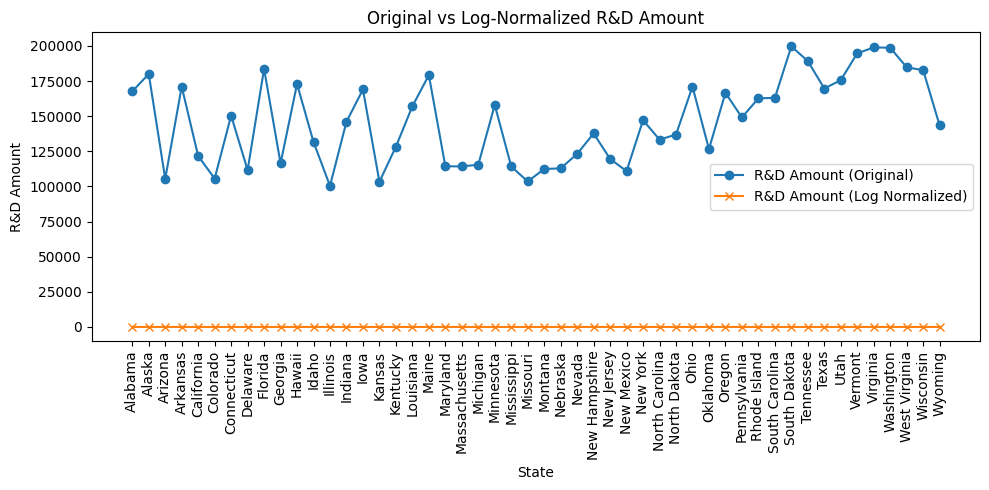

In [5]:

plt.figure(figsize=(10, 5))
plt.plot(data['State'], data['R&D Amount (in $)'], label='R&D Amount (Original)', marker='o')
plt.plot(data['State'], data['R&D Log'], label='R&D Amount (Log Normalized)', marker='x')
plt.xticks(rotation=90)
plt.title('Original vs Log-Normalized R&D Amount')
plt.xlabel('State')
plt.ylabel('R&D Amount')
plt.legend()
plt.tight_layout()
plt.show()


#  Gaussian Distribution
# Plot Gaussian distribution for log-normalized R&D Amount

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


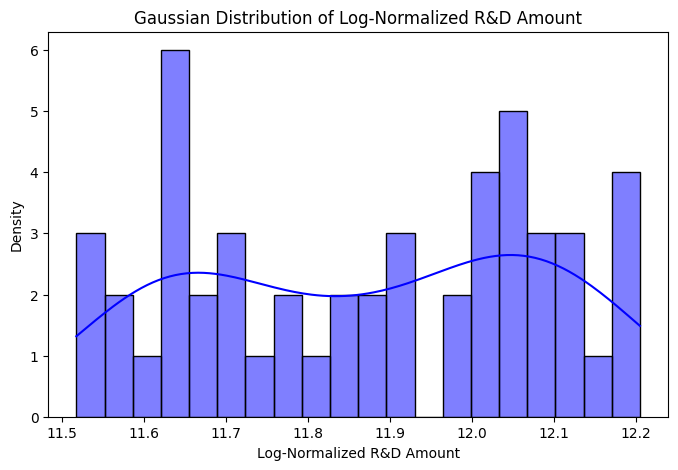

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(data['R&D Log'], kde=True, bins=20, color='blue')
plt.title('Gaussian Distribution of Log-Normalized R&D Amount')
plt.xlabel('Log-Normalized R&D Amount')
plt.ylabel('Density')
plt.show()

# Visualization: Standard Normal Distribution (Z-Scores)

In [7]:

# plt.figure(figsize=(12, 6))
# sns.histplot(data['R&D '], kde=True, bins=30, color='purple', stat="density")
# x = np.linspace(data['R&D Z-Score'].min(), data['R&D Z-Score'].max(), 1000)
# y = 1 / (np.sqrt(2 * np.pi) * std) * np.exp(-0.5 * ((x - mean) ** 2))
# plt.plot(x, y, color='red', label='Theoretical Normal Curve')
# plt.title('Standard Normal Distribution of R&D Amount (Z-Scores)')

# plt.ylabel('Density')
# plt.legend()
# plt.show()

# Output processed data for verification

In [8]:
# data[['State', 'R&D Amount (in $)', 'R&D Log', 'R&D Z-Score']].head()

## fixed err?